# <p style="background-color: #ADD8E6; font-family: Times New Roman; color: black; font-size: 120%; text-align: center; border-radius: 15px 15px; padding: 15px;"><strong>⭐️Seoul Bike Sharing | EDA + XGBRegressor⭐️</strong></p>

# 1. Loading Data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X = pd.read_csv('/kaggle/input/seoul-bike-sharing-demand/SeoulBikeData.csv',encoding= 'unicode_escape')

In [2]:
print('Column in Training Data: \n',X.columns)


Column in Training Data: 
 Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')


In [3]:
# Remove rows with missing target, separate target from predictors
X.dropna(axis=0, subset=['Rented Bike Count'], inplace=True)
y = X['Rented Bike Count']       
X.drop(['Date'], axis=1, inplace=True)

# 2. Exploring Data

In [4]:
print('Shape of training data (num_rows, num_columns)',X.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

Shape of training data (num_rows, num_columns) (8760, 13)
Series([], dtype: int64)


In [5]:
X.head().T

,0,1,2,3,4
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0
Snowfall (cm),0.0,0.0,0.0,0.0,0.0


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
dtypes: float64(6), int64(4), object(3)
memory usage:

In [7]:
X.isna().sum()

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [8]:
categorical_features = X.select_dtypes(include=["object"]).columns
numerical_features =X.select_dtypes(include=["int64", "float64"]).columns

In [9]:
for feature in categorical_features:
    print(f"{feature}: {X[feature].unique()}")

Seasons: ['Winter' 'Spring' 'Summer' 'Autumn']
Holiday: ['No Holiday' 'Holiday']
Functioning Day: ['Yes' 'No']


In [10]:
X.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


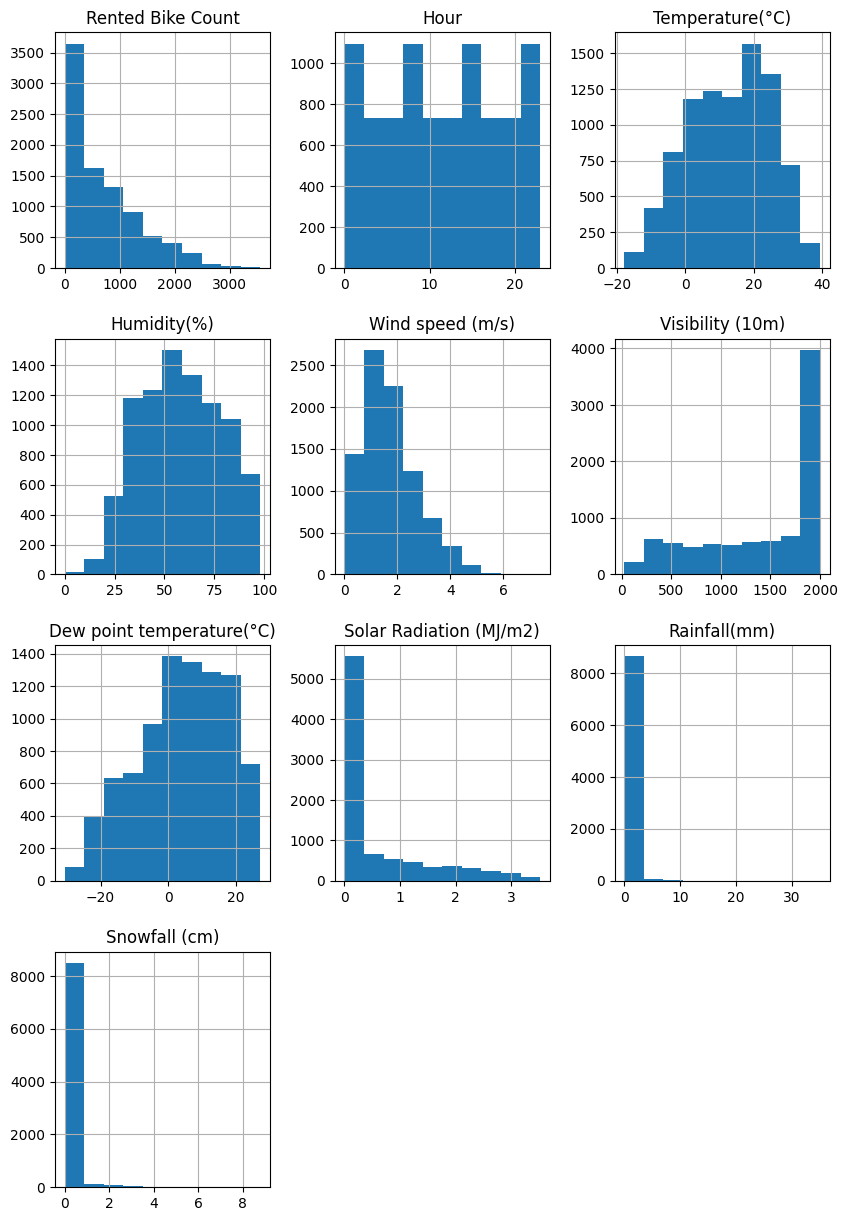

In [ ]:
X.hist(figsize=(10,15));

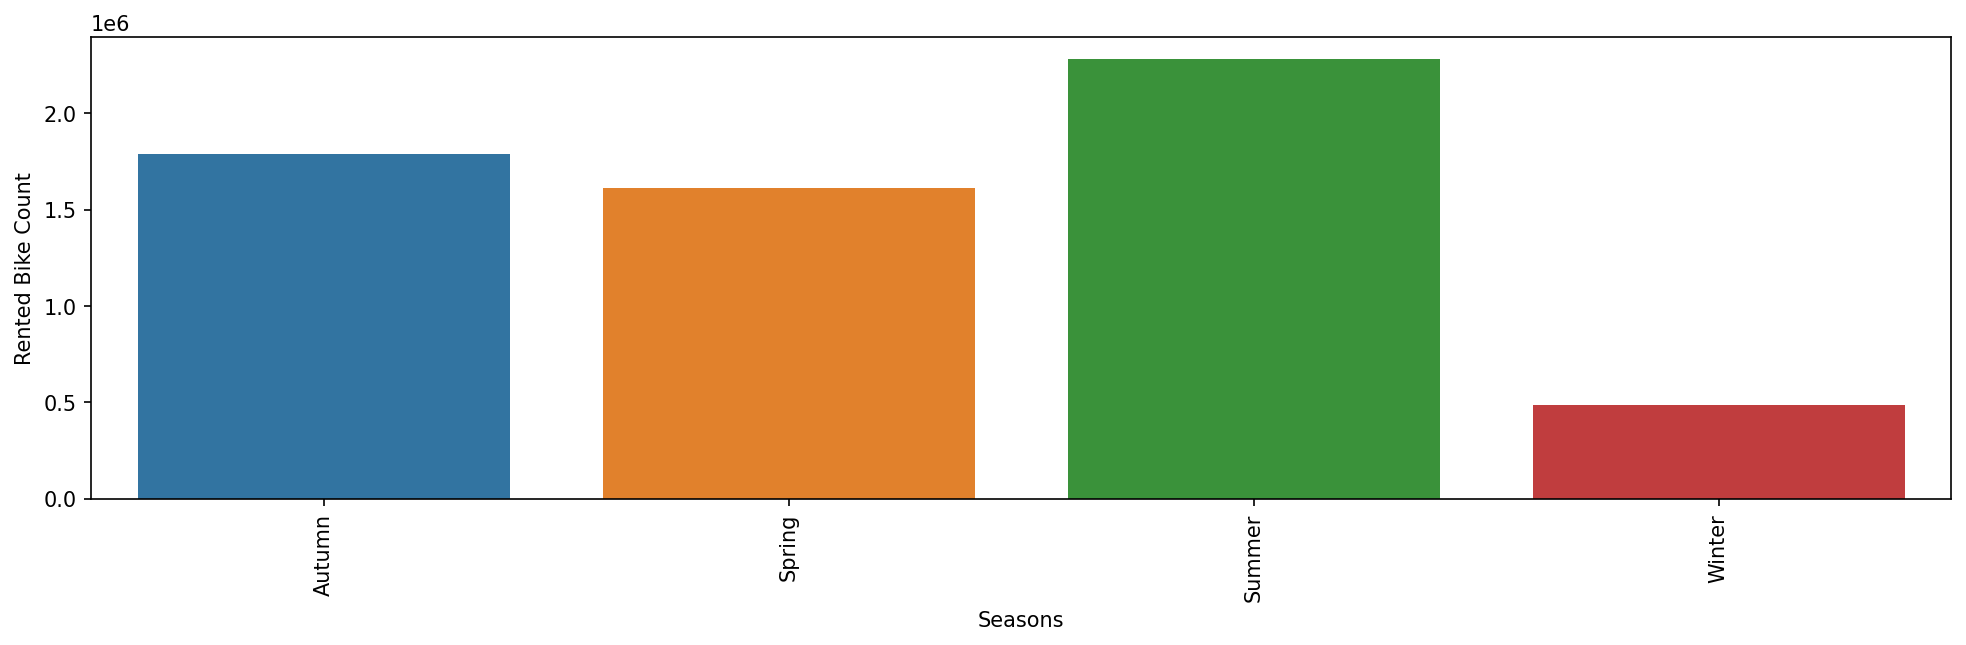

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

Season = X.groupby("Seasons").sum().reset_index()
plt.figure(figsize=(16,4), dpi=150)
sns.barplot(x="Seasons", y="Rented Bike Count", data=Season)
plt.xticks(rotation=90);

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

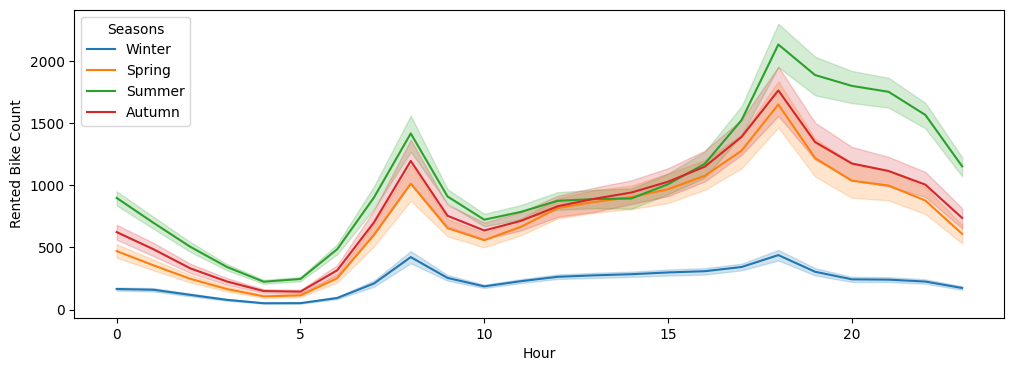

In [13]:

plt.figure(figsize=(12,4), dpi=100)
graph = sns.lineplot(data=X, x="Hour", y="Rented Bike Count", hue="Seasons")

# 3. Feature Engineering

In [14]:
categorical_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in categorical_features:
    if feature == "Seasons":
        df_onehot = pd.get_dummies(X[feature])
        X = pd.concat([X, df_onehot], axis=1)
        X.drop(columns=[feature], inplace=True)
    else:
        le.fit(X[feature])  # Fit the encoder on the entire column
        X[feature] = le.transform(X[feature])  # Transform the column

In [16]:
X.head().T

,0,1,2,3,4
Rented Bike Count,254,204,173,107,78
Hour,0,1,2,3,4
Temperature(°C),-5.2,-5.5,-6.0,-6.2,-6.0
Humidity(%),37,38,39,40,36
Wind speed (m/s),2.2,0.8,1.0,0.9,2.3
Visibility (10m),2000,2000,2000,2000,2000
Dew point temperature(°C),-17.6,-17.6,-17.7,-17.6,-18.6
Solar Radiation (MJ/m2),0.0,0.0,0.0,0.0,0.0
Rainfall(mm),0.0,0.0,0.0,0.0,0.0
Snowfall (cm),0.0,0.0,0.0,0.0,0.0


In [17]:
X.drop(['Rented Bike Count'], axis=1, inplace=True)

In [18]:
X.corrwith(y).abs().sort_values(ascending=False)

Temperature(°C)              0.538558
Winter                       0.424925
Hour                         0.410257
Dew point temperature(°C)    0.379788
Summer                       0.296549
Solar Radiation (MJ/m2)      0.261837
Functioning Day              0.203943
Humidity(%)                  0.199780
Visibility (10m)             0.199280
Snowfall (cm)                0.141804
Rainfall(mm)                 0.123074
Wind speed (m/s)             0.121108
Autumn                       0.102753
Holiday                      0.072338
Spring                       0.022888
dtype: float64

In [19]:

# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y , train_size=0.8, test_size=0.2,
                                                                random_state=0)


# 4. XGBoost Model Training


First, we will train XGBoost baseline model. After that XGBoost model will be trained using hyperparameters obtained through Optuna.

In [20]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score 

model = XGBRegressor(
    n_estimators=2000,
    learning_rate=0.1,
    early_stopping_rounds=50, 
    n_jobs=4,
    seed=34
)

model.fit(
    X_train,
    y_train,
    eval_set=[(X_valid, y_valid)],  
    verbose=False,
)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [21]:

y_pred = model.predict(X_valid)

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
# Calculate metrics
rmse = mean_squared_error(y_valid, y_pred, squared=False)  # RMSE
r2 = r2_score(y_valid, y_pred)

print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Root Mean Squared Error: 229.44912103476025
R-squared: 0.8742077474526426


<p class="author-card" style="border-radius: 25px; overflow: hidden; box-shadow: 0px 4px 20px rgba(0, 0, 0, 0.1); border: 3px solid #27AE60; background-color: #F5F5F5; padding: 30px; transition: transform 0.3s ease; font-family: Georgia; font-style: italic; font-weight: bold; font-size: 38px; text-align: center; background: linear-gradient(90deg, #FF0000, #FF7F00, #FFFF00, #00FF00, #00FFFF, #0000FF, #8B00FF, #FF0000); background-size: 200% 200%; -webkit-background-clip: text; color: transparent; animation: textGradient 10s linear infinite;">If you find my notebook helpful,<br>please consider giving an upvote.</p>

<style>
    p.author-card:hover {
        transform: translateY(-5px);
    }
    @keyframes textGradient {
        0% { background-position: 200% 50%; }
        100% { background-position: 0% 50%; }
    }
</style>